# Pandas 시각화
판다스 자체적으로 matplotlib 를 기반으로 한 시각화기능을 지원한다.    
Series나 DataFrame에 plot() 함수나 plot accessor를 사용한다.
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

## plot() 
- kind 매개변수에 지정한 값에 따라 다양한 그래프를 그릴 수 있다.
- kind : 그래프 종류 지정
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
s = pd.Series([100, 70, 90, 130, 50], index = ['사과', '배', '귤', '수박', '복숭아'])
s

사과     100
배       70
귤       90
수박     130
복숭아     50
dtype: int64

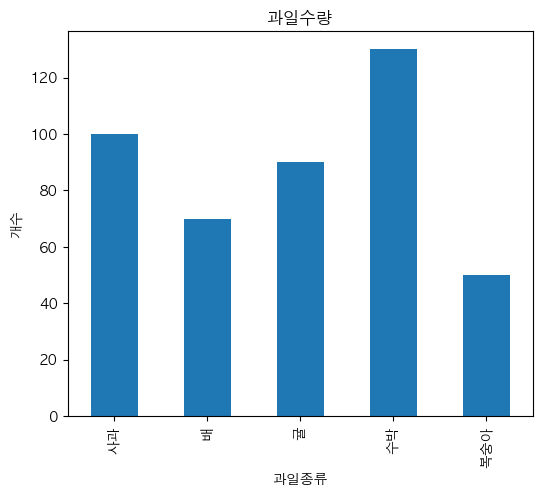

In [13]:
# plt.figure(figsize = (4,3))
s.plot(kind = 'bar', title = '과일수량', xlabel = '과일종류', ylabel = '개수', figsize = (6,5)) # 판다스 //여기서도 적용가능
# plt.title('과일수량') #matplotlib으로 설정
# plt.xlabel('과일')
# plt.ylabel('수량')
plt.show()

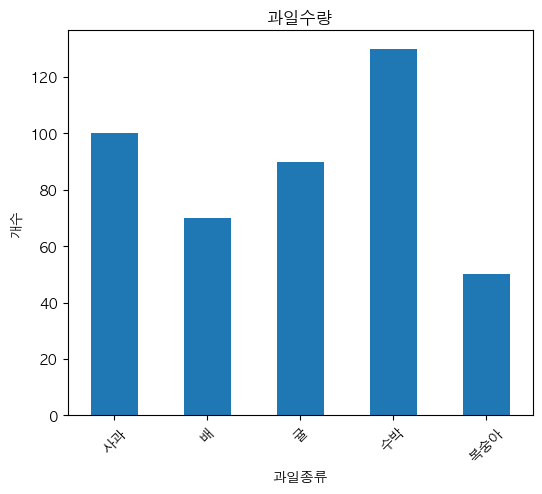

In [16]:
s.plot.bar(title = '과일수량', xlabel = '과일종류', ylabel = '개수', figsize = (6,5), rot = 45)

plt.show()

matplotlib를 이용해 여러 설정들 가능

## 막대 그래프
- index가 무슨 값인지를 가리키는 축으로 사용된다.

In [10]:
tips = pd.read_csv('data/tips.csv')
tips.shape

(244, 7)

In [19]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
cnt_result = tips['day'].value_counts()
cnt_result

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

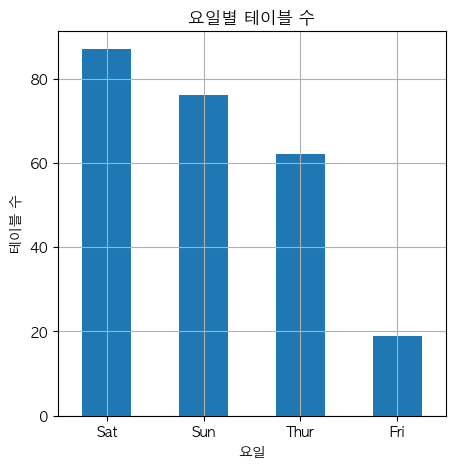

In [7]:
cnt_result.plot(kind = 'bar', title = '요일별 테이블 수', xlabel = '요일', ylabel = '테이블 수', grid = True, rot = 0
               , figsize = (5,5))
plt.show()

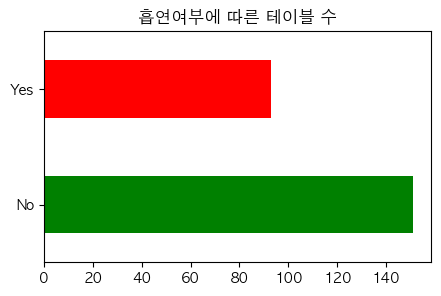

In [11]:
tips['smoker'].value_counts().plot(kind = 'barh', figsize = (5,3), title = '흡연여부에 따른 테이블 수',
                                  color = ['g','r'])
plt.show()

- 두개의 분류 별로 그리기
    - 여러개의 컬럼일 경우 수평 누적 막대그래프를 그린다.


In [12]:
agg_df = tips.pivot_table(index = 'smoker', columns = 'sex', values = 'tip', aggfunc = 'count') # mean 으로 바꾸면 평균을 구하게 됨.
agg_df

sex,Female,Male
smoker,,
No,54,97
Yes,33,60


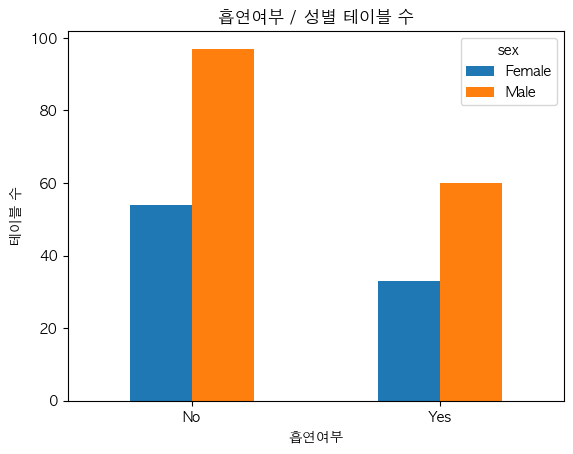

In [13]:
agg_df.plot(kind = 'bar', title = '흡연여부 / 성별 테이블 수', xlabel = '흡연여부', ylabel = '테이블 수', rot = 0)
plt.show()

- 요일/성별 손님의 총 수(size)

In [54]:
agg_cu = tips.pivot_table(index = 'sex', columns = 'day', values = 'size', aggfunc = 'sum')
agg_cu

day,Fri,Sat,Sun,Thur
sex,,,,
Female,19,63,53,79
Male,21,156,163,73


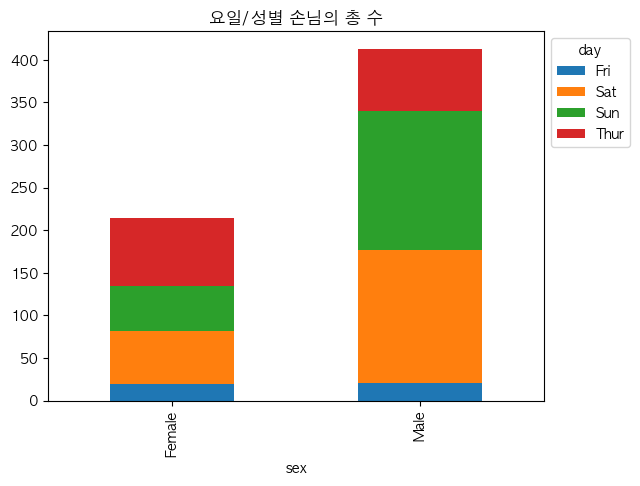

In [57]:
agg_cu.plot(kind = 'bar', title = '요일/성별 손님의 총 수', stacked = True) # stacked = True 차트를 겹겹이 샇는 명령어
plt.legend(bbox_to_anchor = (1,1), loc = 'upper left', title = 'day')
plt.show()

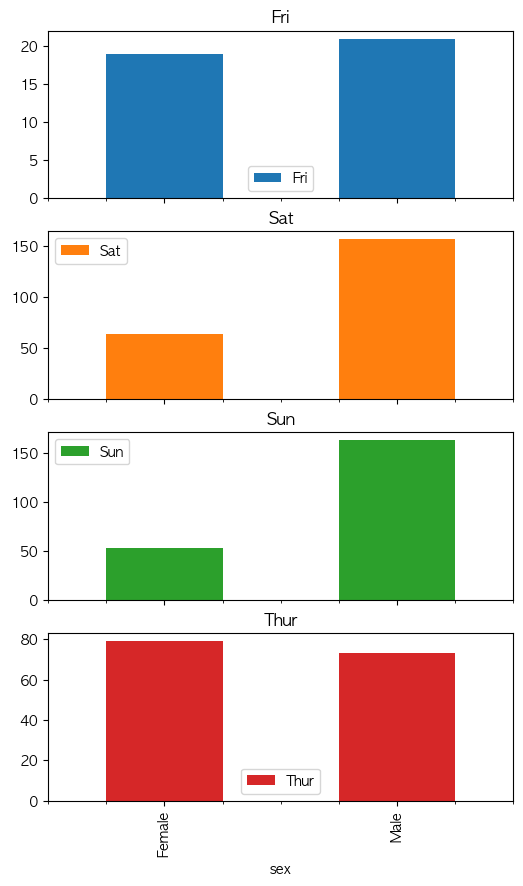

In [58]:
agg_cu.plot(kind = 'bar', subplots= True, figsize = (6,10)) # subplots= True 아래와 같이 나누는 명령어
plt.show()

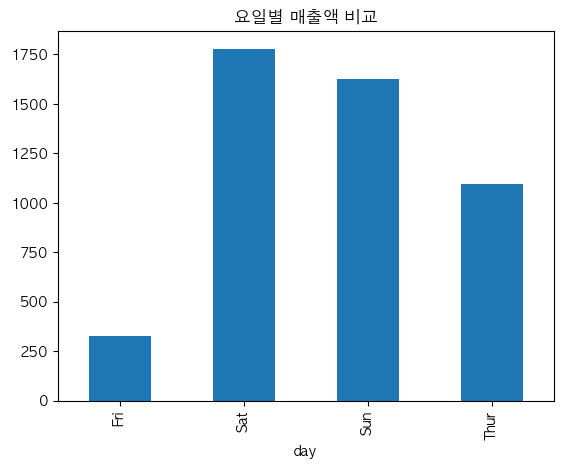

In [60]:
tips.groupby('day')['total_bill'].sum().plot(kind = 'bar', title = '요일별 매출액 비교')
plt.show()

## 파이차트

In [67]:
tips['day'].value_counts()
# index : label
# value : 비율계산

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

<AxesSubplot: ylabel='day'>

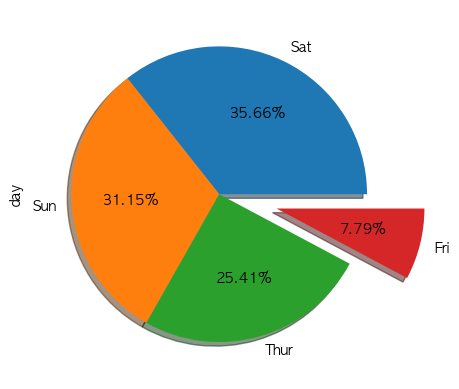

In [16]:
# tips['day'].value_counts(normalize = True) # normalize = True 은 퍼센테이지로 나타내기
tips['day'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = [0,0,0,0.4], shadow = True)

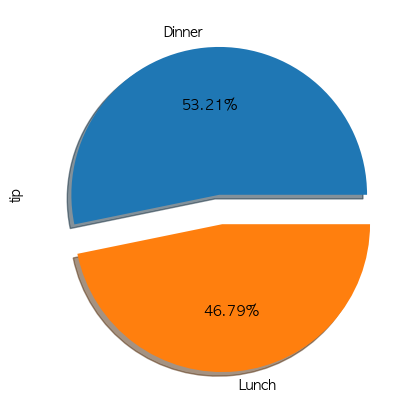

In [20]:
tips.groupby('time')['tip'].mean().plot.pie(autopct = '%.2f%%', shadow = True, explode = [0,0.2])
plt.show()

## 히스토그램, KDE(밀도그래프)

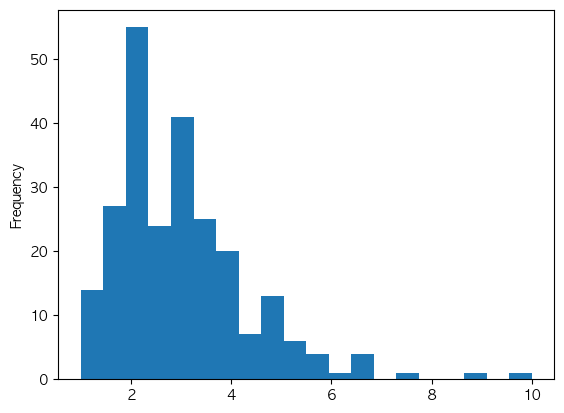

In [78]:
# tips['tip'].plot(kind = 'hist', bins = 20)
tips['tip'].plot.hist(bins = 20) # 위 아래 둘다 같은 명령어
plt.show()

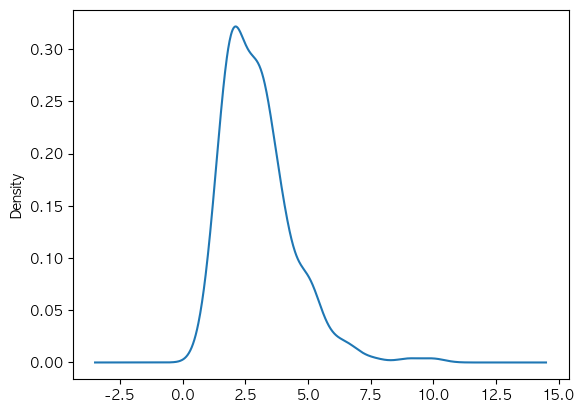

In [81]:
tips['tip'].plot(kind = 'kde')
plt.show()

In [80]:
# !pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 15.5 MB/s eta 0:00:00m eta 0:00:010:01:01


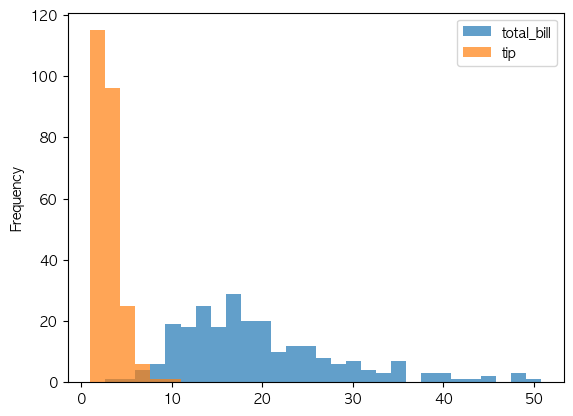

In [86]:
tips[['total_bill', 'tip']].plot(kind = 'hist',bins =30, alpha = 0.7)
plt.show()

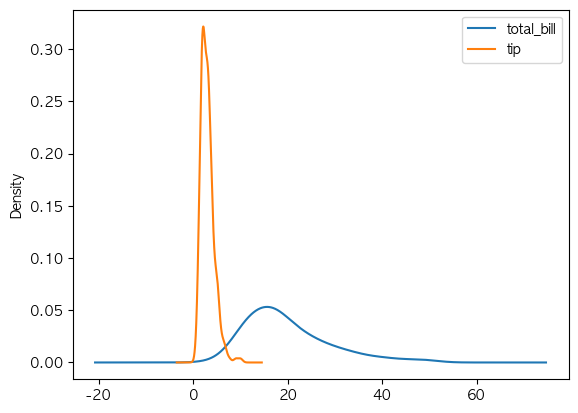

In [88]:
tips[['total_bill', 'tip']].plot(kind = 'kde')
plt.show()

## Boxplot (상자그래프)

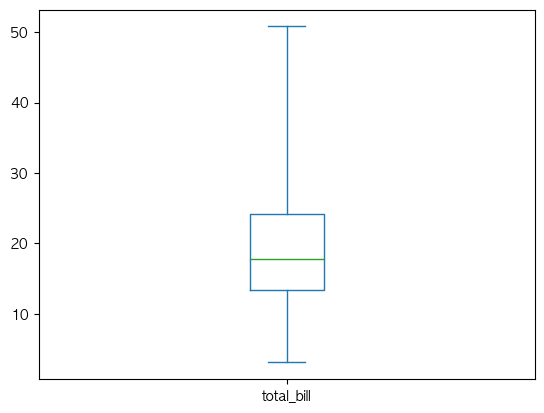

In [28]:
tips['total_bill'].plot(kind = 'box', whis = 3)
plt.show()

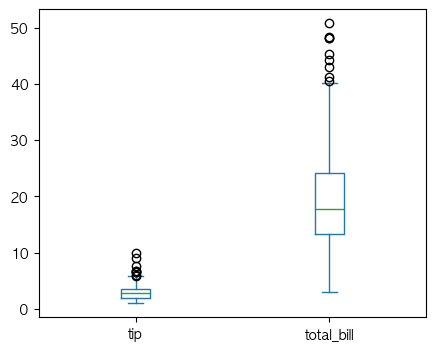

In [93]:
tips[['tip','total_bill']].plot(kind = 'box', figsize = (5,4)) # 두 값을 비교할때 사용
plt.show()

## scatter plot (산점도) 

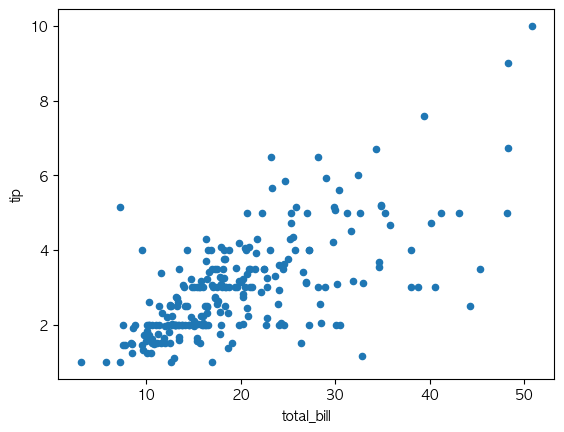

In [95]:
# DataFrame 을 이용해서 그린다. (Series는 그릴 수 없다.)
tips.plot(kind = 'scatter', x = 'total_bill', y = 'tip')
plt.show()

In [96]:
tips[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


### line plot

In [33]:
df = pd.read_excel('data/강수량.xlsx')
df
df1 = df.set_index('계절').T
df1

계절,봄,여름,가을,겨울
2009,231.3,752.0,143.1,142.3
2010,302.9,692.6,307.6,98.7
2011,256.9,1053.6,225.5,45.6
2012,256.5,770.6,363.5,139.3
2013,264.3,567.5,231.2,59.9
2014,215.9,599.8,293.1,76.9
2015,223.2,387.1,247.7,109.1
2016,312.8,446.2,381.6,108.1
2017,118.6,609.7,172.5,75.6


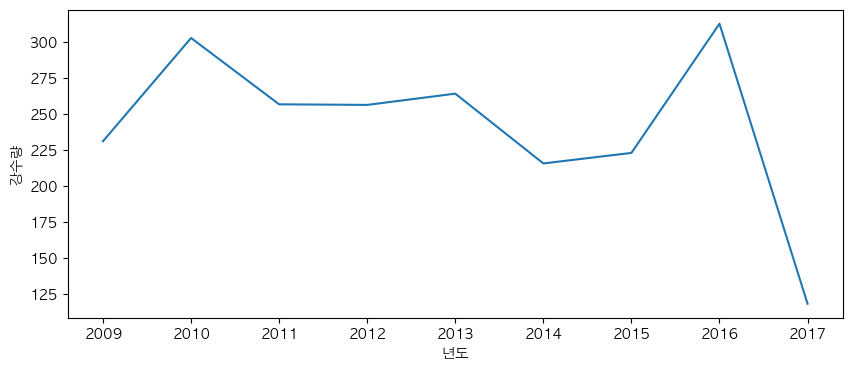

In [111]:
# x: index, y: value
df1['봄'].plot(figsize = (10,4), xlabel = '년도', ylabel = '강수량') #kind = 'line' (default)
plt.show()

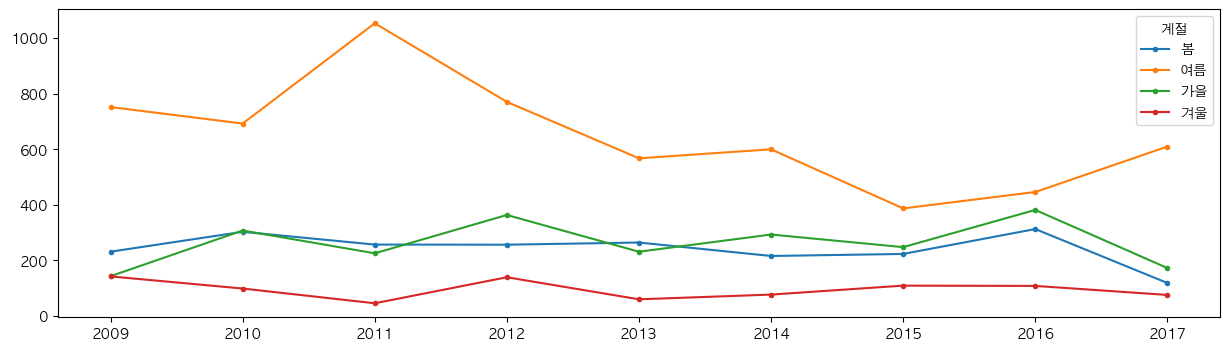

In [132]:
# dataframe.plot(): index-X, 컬럼별로 선그래프를 그린다.
df1.plot(figsize = (15,4), marker = "." )
plt.show()

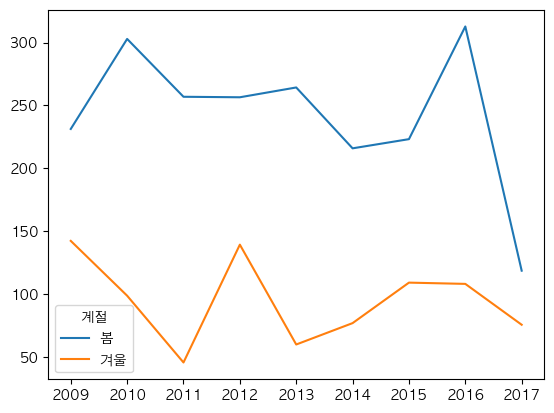

In [124]:
df1[['봄', '겨울']].plot()
plt.show()